# Hand Gesture Recognition using CNN

`Author:` [Sagar Kanekar](https://github.com/TheShade1551)\
`Date:` 31.December.2024\
`Dataset:`[Leap Gesture Recognition Dataset](https://www.kaggle.com/datasets/gti-upm/leapgestrecog/data)


### About Dataset(Meta Data)

#### Context:-
- Following Dataset is a Image Dataset of Collection of Hand Gesture Photographs taken from Leap Motion Sensor Camera.
- This Dataset is a Consists of 10 Subject(Persons:- 5 Male, 5 Female) performing 10 Different Hand Gestures Each.
- All Captured Images are Near Infrared Images, Providing a Focused View of the Hand Gesture.

#### Content:-
- Type of 10 Hand Gestures are as follows:-
  1. `Palm`:- ✋Palm Gesture
  2. `I`:- ☝️ I Gesture
  3. `Fist`:- ✊ Fist Gesture
  4. `Fist_moved`:- 🤜 Moved-Fist Gesture
  5. `Thumb`:- 👍Thumb Gesture
  6. `Index`:- 👆 Index-Finger Gesture
  7. `Ok`:- 👌Ok Gesture
  8. `Palm_moved`:- 🫸Moved-Palm Gesture
  9. `C`:- 🤏C-Hand Gesture
  10. `Down`:- 🫳Down Palm Gesture
- Each Gesture is Performed 200 Times by Each Subject for Providing Ample Samples.

### Acknowledgements:-
- The [Leap Gesture Recognition Dataset](https://www.kaggle.com/datasets/gti-upm/leapgestrecog/data) was Created by [GTI-UPM](https://www.gti.ssr.upm.es/) -  **G**rupo de **T**ratamiento de **I**mágenes - **U**niversidad **P**olitecnica de **M**adrid.
- **GTI-UPM** is a Research Group in **Polytechnic University of Madrid** on Theory, Methods, and Applications of `Digital Image Processing`, mainly for Compression and Analysis.
- Dataset is Made Available by Kaggle under [Creative Commons License](https://creativecommons.org/licenses/by-nc-sa/4.0/)

### Citation:-
- [T. Mantecón, C.R. del Blanco, F. Jaureguizar, N. García. “Hand Gesture Recognition using Infrared Imagery Provided by Leap Motion Controller”](https://www.kaggle.com/datasets/gti-upm/leapgestrecog/overview/$citation)

---
### Problem Statement:-
- To Develop a Hand-Gesture-Recognition Model that can Accurately Identify & Classify Different Hand-Gestures From Image Data.

## `Importing Libraries`

In [52]:
# Importing Libraries

# Data Manipulation & Analysis
import numpy as np
import os
from PIL import Image

# Data Visulization
import matplotlib.pyplot as plt
import matplotlib.image as img

# Machine Learning Models & Utilities
import keras
from sklearn.model_selection import train_test_split
# Saving trained Model
from joblib import dump

# Handling Unnecessary Warnings
import warnings
warnings.filterwarnings('ignore')

## `Loading Files`

- There are 10 Folders Labelled 00 to 99, in each Folder containing Subfolder for Each Gesture.
- Building Dictionary `Lookup` :- Storing Names of the Gestures to be Identified.
- Building Dictionary `ReverseLookup` :- For Understanding Association of Respective Gesture with given Identifier.

In [53]:
lookup = dict()
reverselookup = dict()
count = 0
path = r"c:\Users\SAGAR\Desktop\Prodigy\Task-04_Hand_Gesture_Recognition\leapGestRecog\00"
print(path)
for j in os.listdir(path):
    if not j.startswith('.'): #to insure safe local running, without accessing hidden files
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

c:\Users\SAGAR\Desktop\Prodigy\Task-04_Hand_Gesture_Recognition\leapGestRecog\00


{'01_palm': 0,
 '02_l': 1,
 '03_fist': 2,
 '04_fist_moved': 3,
 '05_thumb': 4,
 '06_index': 5,
 '07_ok': 6,
 '08_palm_moved': 7,
 '09_c': 8,
 '10_down': 9}

### Reading & Preprocessing Images
- Storing Image Data in `x-data`
- Storing Numerical Classifier for each Image in `y_data`
- Converting Images to Grayscale & resizing to 320 x 120 dimension.
- Keeping Count of the Total Images in the Dataset using `datacount` variable

In [54]:
x_data = []
y_data = []
datacount = 0 # We'll use this to tally how many images are in our dataset
path = r"c:\Users\SAGAR\Desktop\Prodigy\Task-04_Hand_Gesture_Recognition\leapGestRecog\0"

In [55]:
for i in range(0, 10): # Loop over the ten top-level folders
    for j in os.listdir(path + str(i) + '/'):
        if not j.startswith('.'): # Again avoid hidden folders
            count = 0 # To tally images of a given gesture
            for k in os.listdir(path + 
                                str(i) + '/' + j + '/'):
                                # Loop over the images
                img = Image.open(path + 
                                 str(i) + '/' + j + '/' + k).convert('L')
                                # Read in and convert to greyscale
                img = img.resize((320, 120))
                arr = np.array(img)
                x_data.append(arr) 
                count = count + 1
            y_values = np.full((count, 1), lookup[j]) 
            y_data.append(y_values)
            datacount = datacount + count

In [56]:
datacount

20000

- Total 20,000 Images are in the Dataset.

In [57]:
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1) # Reshape to be the correct size

## `Visualising Images`


- Using `Random` to Visualise All 10 Gestures through Randomly Picked Images from `x_data`
- Each Gesture has 200 images, Hence We'll Select a Random Image from each 200 Gesture Iterations.

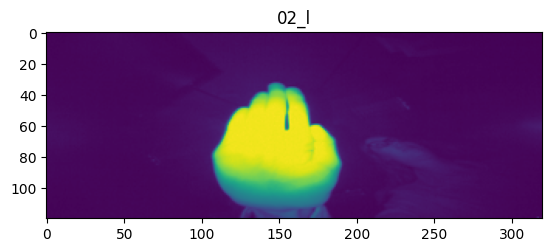

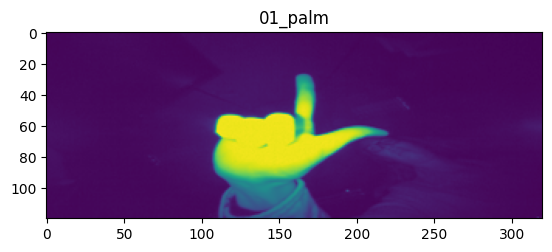

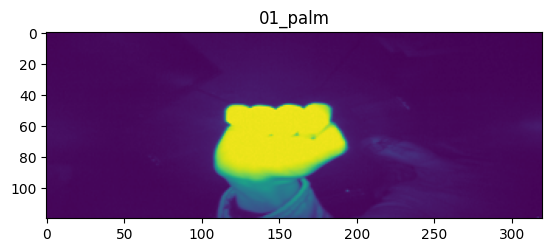

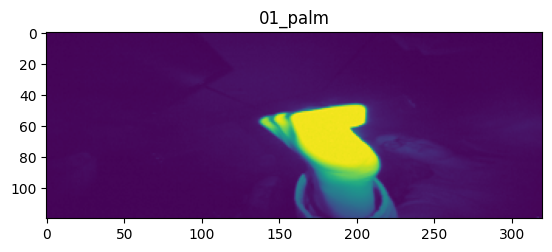

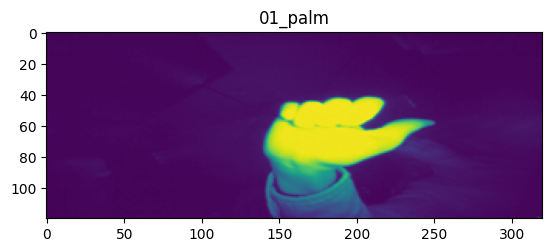

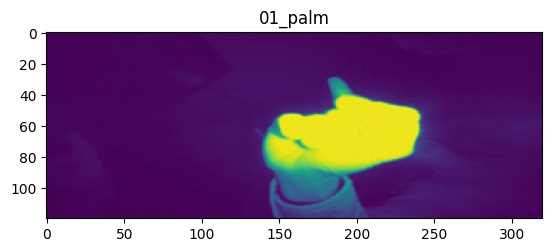

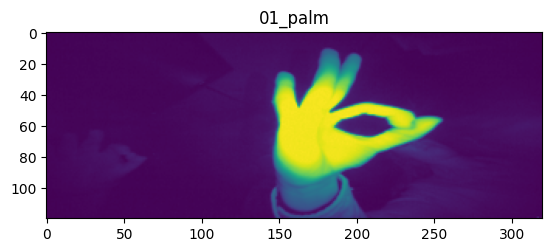

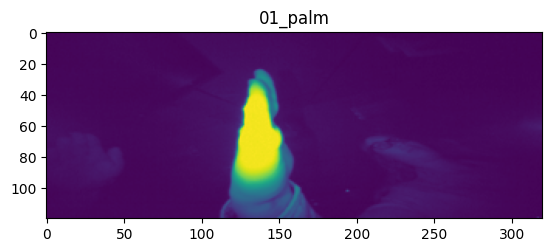

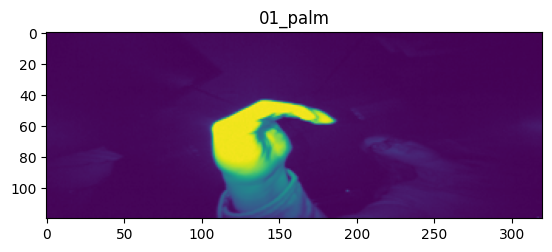

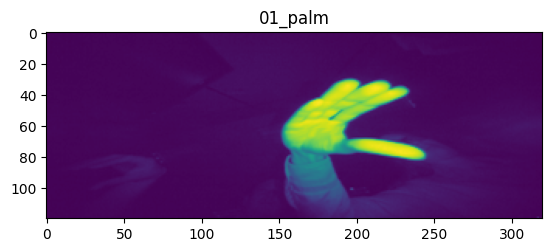

In [100]:
from random import randint
import matplotlib.pyplot as plt

# Loop through each gesture group
for i in range(10):  # Assuming there are 10 gestures (0-9)
    start_index = i * 200  # Starting index for the gesture group
    end_index = start_index + 200  # Ending index for the gesture group
    random_index = randint(start_index, end_index - 1)  # Select a random index within the group
    
    plt.imshow(x_data[random_index, :, :])  # Display the randomly selected image
    plt.title(reverselookup[y_data[random_index, 0]])  # Use the corresponding label for the title
    plt.show()


 ## Label Encoding

- Currently, `y_data` has shape `(datacount, 1)` & `y_data`[i,0] = `j`
- Here `i` represents 10 Gestures - Labels of Dataset.
- One Hot Encoding Labels using Keras Function `to_categorical`
- This Will be useful to apply `Catrgorical Cross-Entropy`Loss Function Later.

In [59]:
from keras.utils import to_categorical
y_data = to_categorical(y_data)

 - Currently `x_data` has shape (datacount, 120, 320).
 - Keras will be expecting another slot to tell it the number of channels, so we reshape x_data accordingly.
 - Also Rescaling the values in `x_data `to lie between 0 and 1.

In [60]:
x_data = x_data.reshape((datacount, 120, 320, 1))
x_data /= 255

## `Model Training`

- Performing `Train_test_Split` using `Sklearn` to Split Data in 80:20 Split.
- Performing `Train_test_Split` again to Split `test` data 50:50 into `test` & `validation` to perform `Cross-Validation`

In [82]:
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

### `Building Neural Network`


In [83]:
from keras import layers
from keras import models

- Intializing a `Sequential` model, with Layers Stacked on Top of One Another.
- `DownSampling Images:` with `5 x 5` Layer & Stride `2`
- Specifying the `input shape:- (120, 320, 1)` of Images at Initial Layer.
- `Padding` Not required, as all useful features are Well Accessible Inside the Image.
- Building a Sequence of `Convolutional Layers` with `Activation Function:- ReLU` to Introduce Non-Linearity, followed by `Max-Pooling` to Reduce Spatial Dimensions of Image Data.
- Performing Above Step until, we achieve image Small Enough, which to be added in the `fully_connected_layer`
- Then `Flattening` the `2D output` of Previous Layers into a `1D Vector`.
- Finally Esablishing a `Fully_Connected_Layer` with `ReLU` Activation to Learn Complex Patterns.
- Creating an `Output Layer` for Classification with `10` Neurons(One for Each Class) with a `Softmax` Activation, which Converts Output into a `Probablity Distribution` across the 10 Classes.

In [84]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

## `Model Fitting`

#### Compiling & Training `Convolutional Neural Network(CNN)`

In [87]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Compiling the Model**
- `Optimiser:- RMSprop`:- **Root Mean Squre Propogation** - Adaptive Learning Rate Optimiser - Adjusts Learning Rate for Each Parameter based on Recent Gradient History.
- `Loss Function`:- **Categorical-Cross_Entropy** - Used for MultiClass Classification Problem - Suitable for One hot Encoded Output.
- `Metrics`:- **Accuracy**

In [88]:
model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 174ms/step - accuracy: 0.7178 - loss: 0.8202 - val_accuracy: 0.9985 - val_loss: 0.0099
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 44s 177ms/step - accuracy: 0.9971 - loss: 0.0126 - val_accuracy: 0.9995 - val_loss: 0.0101
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 44s 177ms/step - accuracy: 0.9981 - loss: 0.0088 - val_accuracy: 0.9985 - val_loss: 0.0035
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 38s 152ms/step - accuracy: 0.9997 - loss: 0.0012 - val_accuracy: 0.9995 - val_loss: 0.0039
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 141ms/step - accuracy: 1.0000 - loss: 6.7727e-06 - val_accuracy: 0.9995 - val_loss: 0.0040


**Training the Model**
- `Epochs:- 5`:- Processing Training Data `5` Times.
- `Batch-Size - 64`:- Model Processes `64` Samples Before Updating Weights.
- `Verbose - 1`:- Displaying `Loss` & `Accuracy` after Each Epoch.
- `Validation Data`:- To Evaluate Model's Performance After Each Epoch, Improving `Generelisation`

#### `Tracking Model's Progress`

In [89]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 58, 158, 32)    │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 29, 79, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 27, 77, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 13, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 11, 36, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 5, 18, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 5760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       737,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,589,910 (6.07 MB)

 Trainable params: 794,954 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 794,956 (3.03 MB)

### `Model Evaluation`


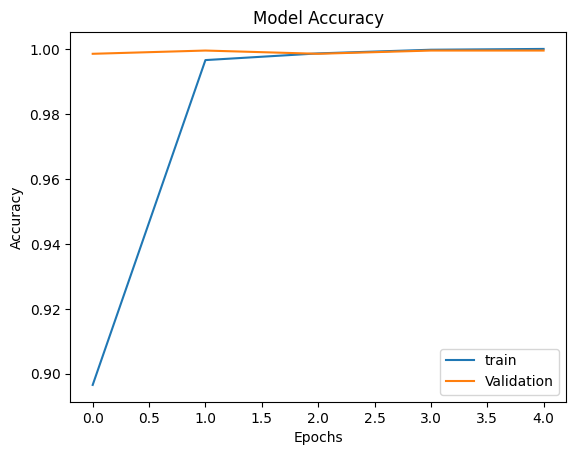

In [91]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'Validation'])
plt.show()

- Model Performed Very well on Training & Validation Data.

### `Inference:-`


- Model is Achieving Accuracy of `100%` on **Validation Set** after `3` Epochs & `Perfect` Accuracy on **Training Data** after `5` Epochs.
- Implementing Model on **Test Set** to Check the **Generalisation**

In [92]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9995 - loss: 5.1962e-04
Accuracy:0.9994999766349792


Model Achieves Accuracy of **99.94%** on **Test**(Unseen) Data.

In [93]:
## Saving Model using Joblib
import joblib
joblib.dump(model, 'model_filename.pkl')

['model_filename.pkl']

### `Predicting Single Images Using Trained Model`

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


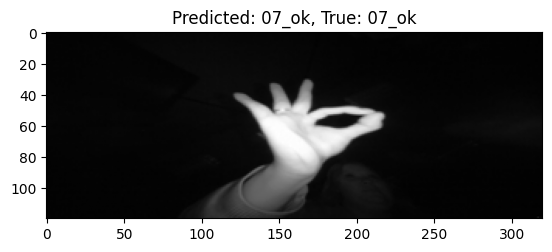

In [102]:
import random
import joblib
import numpy as np
import matplotlib.pyplot as plt

# Load an image randomly from the dataset
random_index = random.randint(0, len(x_data) - 1)  
random_image = x_data[random_index]  # Get the image directly
true_label = y_data[random_index] # Get the corresponding label

# Load the model
loaded_model = joblib.load('model_filename.pkl')

# Reshape the image for prediction, adding a batch dimension
random_image_reshaped = random_image.reshape((1, 120, 320, 1))

# Predict using the loaded model
prediction = loaded_model.predict(random_image_reshaped)
predicted_label_index = np.argmax(prediction)
predicted_label = reverselookup[predicted_label_index]

# Convert true_label to human-readable format
true_label_index = np.argmax(true_label)  # Find the index of the maximum value (which is 1 in one-hot encoding)
true_label_name = reverselookup[true_label_index]  # Use the index to look up the gesture name

# Plot the image with the prediction
plt.imshow(random_image, cmap='gray')  # Adjust cmap if it's RGB
plt.title(f"Predicted: {predicted_label}, True: {true_label_name}")
plt.show()

### Conclusion
- **Convolutional Neural Network(CNN)** was Successfully fit on `Leap Gesture Recognition Dataset` to Predict the `Hand Gestures` Performed by Different Subjects Captured Using `Leap Motion Sensor Camera` with a Accuracy of **99.94%** on Unseen Data.